# Notebook 28: P and NP


Up until now, we have not concerned ourselves at all with time or space efficiency, writing machines that are ridiculously inefficient. In this unit, we will finally turn our attention to the issue of time complexity. (Space complexity is an advanced topic that we will not cover.)

## Time complexity

I assume you're familiar with how to analyze time complexity of algorithms. Here's a little self-quiz you can take:

- True or false: $O(2n)$ and $O(3n)$ are the same complexity class.

- True or false: $O(n^2)$ and $O(n^2 + n)$ are the same complexity class.

- True or false: $O(2^n)$ and $O(3^n)$ are the same complexity class.

- True or false: Big-O ($O(\cdot)$) measures worst-case time complexity and small-o ($o(\cdot)$) measures best-case time complexity.

<div class="alert alert-info">
    <p><b>Read</b> Section 7.1, pages 275–281, if you need to review big-O notation.</p>
</div>

## Models of computation

<div class="alert alert-info">
    <p><b>Read</b> Section 7.1, pages 282-284.</p>
</div>

Complexity analysis always assumes an underlying model of computation. In the past, you've always analyzed your programs for the platform you're actually running on -- which is fine because differences in platforms usually only affect running time by constant factors, so they don't impact big-O time complexity at all. However, in this class, we're trying to consider a wider range of models of computation, wide enough that the same algorithm implemented in two different models might have different big-O time complexities.

The book, in 7.1, analyzes multitape Turing machines and nondeterministic Turing machines in relation to standard Turing machines. The analysis has the form: if a computation takes $O(t(n))$ time on some machine, how long would the equivalent computation take on a standard Turing machine?

With multitape Turing machines, recall that the tapes are simulated on a single-tape Turing machine like this:


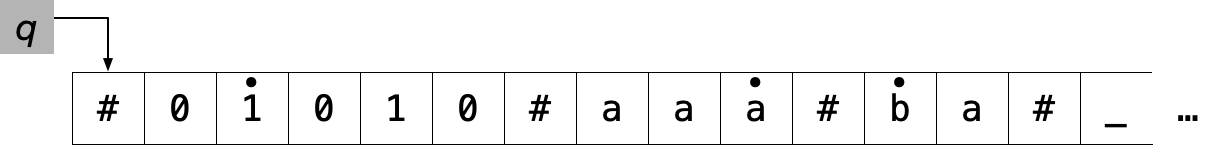

To analyze this, first note that a $k$-tape TM can write at most $k$ symbols per timestep. So in total, it can write at most $kt(n)$ symbols. So the single-tape TM can also write only $O(t(n))$ symbols.

In the multitape TM, accessing the current cell requires 1 operation, but simulating this in a single-tape TM takes $O(t(n))$ time, because you might have to rewind or fast-forward through another tape to get to the cell you want to access.

So the total running time of the simulation is $O(t(n)^2)$.

With nondeterministic Turing machines, recall that we had to do a breadth-first search through the possible configurations of the NTM.



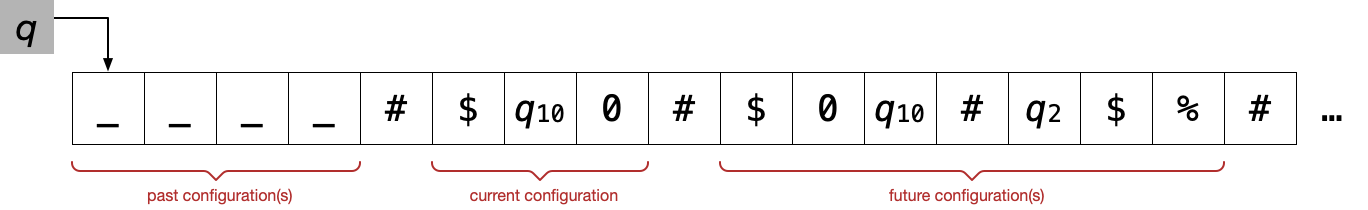

Since the number of configurations is exponential in $t(n)$, the running time of the equivalent deterministic TM is $O(c^{t(n)})$ for some $c$, which the book writes as $2^{O(t(n)}$.

(Moreover, for each configuration, there is an additional $O(t(n))$ factor required for moving back and forth between where the previous configuration and next configuration are stored, but that gets absorbed into $c$.)

In Algorithms class, you will (implicitly) analyze algorithms on the RAM machine, which was an optional topic in Week 8. In this model, each tape square holds a (arbitrarily large) natural number. You can instantly jump to any square. You can add, subtract, and compare squares. You can also treat a square as a pointer, reading its value $x$ and accessing the square at position $x$. A RAM machine program can be simulated by a multitape TM ([Cook and Reckhow](https://doi.org/10.1016/S0022-0000%2873%2980029-7)).

If we assume that accessing a memory location with value $x$ takes $O(\log_2 x)$ time (linear in the number of bits), then a RAM machine program that runs in $t(n)$ time can be simulated by a multitape TM in $O(t(n)^2)$ time. As in the multitape-to-single-tape construction, the basic idea is that getting to a memory cell may take $O(t(n))$ time, so the simulation slows down by a factor of $O(t(n))$.

So simulating a RAM machine computation with $t(n)$ steps on a *single-tape* TM would take $O((t(n)^2)^2) = O(t(n)^4)$ time. I suspect this can be improved to $O(t(n)^2)$ time if we go straight from a RAM machine to a single-tape TM.

### Digression: Which model is the most realistic?

Which of these models is an actual computer most like? Having programmed Turing machines, you probably feel that they're very unlike actual computers, and the RAM machine is more like an actual computer. But the truth is somewhere in between. Accessing memory is never instantaneous; it always depends on how large the memory is:

- Magnetic tape (which is still surprisingly common) is a lot like a Turing machine tape: to access a location, you have to rewind or fast-forward to the right place on the tape, which takes time $O(n)$ where $n$ is the size of the tape.

- Memory access time also depends on the length of the wire to the memory location: Prof. Joshi tells me that the longer the wire, the larger the capacitor used for a bit, which takes longer to charge. Most memory is laid out in two dimensions, making the access time something like $O(n^{1/2})$, although three-dimensional memory is starting to be used, which would be $O(n^{1/3})$.

- Hard disks are also two dimensional: you have to move the head to the right track, then wait for the disk to spin so that the location you want is under the head.

So a one-dimensional, two-dimensional, or three-dimensional tape would seem to be a good model of actual memory, depending on how the memory is physically laid out. Most memory these days is two-dimensional, so I say that a two-dimensional tape is the most realistic.

Across levels of the memory hierarchy, one would expect a roughly similar relationship to hold, from the fastest and smallest level to the slowest and largest level. A *very* naive scatter plot of access time vs. memory size shows that the relationship is worse than $x^{1/2}$:

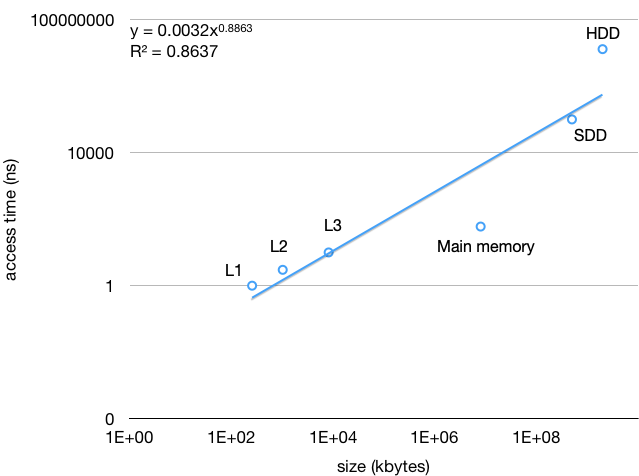

### P and NP

<div class="alert alert-info">
    <p><b>Read</b> Section 7.2, pages 284-286.</p>
</div>

The point of the above discussion is that all the *deterministic* models of computation differ from each other only polynomially, in the sense that an algorithm that takes time $t(n)$ on a multitape TM or a RAM machine can be simulated on a standard TM in time $O(t(n)^l)$ for some $l$. In particular, if $t(n)$ is polynomial in $n$, that is, $t(n) \in O(n^k)$, then the simulation on a standard TM is still polynomial-time, $O(n^{k+l})$.

So, just as we used to ignore the difference between (say) $2n$ and $3n$, because this difference could simply be due to running on a 3 GHz machine and a 2 GHz machine, we also now ignore the difference between (say) $n^2$ and $n^3$, to abstract away from the differences between single-tape, multi-tape, or RAM machines. We will simply talk about P, the class of languages decidable in polynomial time by a deterministic machine, whether it's a single-tape or multi-tape Turing machine or a RAM machine or some other machine.

However, nondeterminism is very different from the other TM variants. You can imagine building physical versions of the deterministic machines (my digression on RAM notwithstanding) but not of a nondeterministic TM. And simulating a nondeterministic TM on a standard TM is much slower than the other simulations. Therefore we don't lump NTMs in with the other TM variants, and we define NP to be the class of languages decidable in polynomial time by a NTM.

### More about NP

<div class="alert alert-info">
    <p><b>Read</b> Section 7.3. Although you skipped the examples of problems in P, I think it's important to read this section in its entirety.</p>
</div>

An example of a problem in NP is HAMPATH (Hamiltonian path): Given a directed graph $G$ with $n$ nodes and two nodes $s$ and $t$, is there a Hamiltonian path from $s$ to $t$? A Hamiltonian path is a sequence of nodes $v_1, \ldots, v_n$ such that

- $v_1 = s$
- $v_n = t$
- for all $i$, $(v_i, v_{i+1})$ is an edge
- for all $i \neq j$, $v_i \neq v_j$

For example, this is a Hamiltonian path:

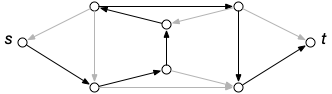

Proving that a language $A$ is in NP technically requires describing a NTM that decides $A$, plus a complexity analysis of the NTM. For HAMPATH, we might say that it's decided by $N = {}$On input $\langle G, s, t\rangle$:

1. Nondeterministically consider all possible paths of $n$ nodes, $v_1 \cdots v_n$.
2. For each,
    1. Check that $v_1 = s$ and $v_n = t$.
    2. Check that for all $i$, $(v_i, v_{i+1})$ is an edge in $G$.
    3. Check that for all $i \neq j$, $v_i \neq v_j$.
    4. If all of the above are true, *accept*.
    
This runs in time $O(n^2)$ (step 2C isn't very efficient).

More examples:

- COMPOSITES is given an integer $x$ with $n$ bits and searches for a nontrivial factorization $pq = x$.
- CLIQUE is given a graph with $n$ nodes and searches for a $k$-clique (a fully connected subgraph with $k$ nodes).
- SUBSET-SUM is given a set of $n$ integers and searches for a subset that adds up to $t$.

However, NTMs are inconvenient to define and analyze. The book actually defines NP differently, and in a way that is easier to prove membership in. (The two definitions are equivalent by Theorem 7.20.) NP problems usually involve some sort of search. A *verifier* for $A$ is a (deterministic) Turing machine that can verify whether something is the thing being searched for. That is, a verifier decides a language $A'$ such that $A = \{ w \mid \text{$\langle w, c\rangle \in A'$ for some $c$} \}$. A polynomial-time verifier runs in time polynomial in $|w|$.

For example, a verifier for HAMPATH would be $V = {}$On input $\langle \langle G, s, t\rangle, v_1\cdots v_n\rangle$:

1. Check that $v_1 = s$ and $v_n = t$.
2. Check that for all $i$, $(v_i, v_{i+1})$ is an edge in $G$.
3. Check that for all $i \neq j$, $v_i \neq v_j$.
4. If all of the above are true, *accept*.

This runs in time $O(n^2)$.

More examples:

- A verifier for COMPOSITES just has to check that $pq = x$, which takes time quadratic in $n$.
- A verifier for CLIQUE just has to check that the subgraph has $k$ nodes and is fully connected, which is quadratic in $n$.
- A verifier for SUBSET-SUM just has to check that the integers in the subset add up to $t$, which is linear in $n$.

So, to show that $A$ is in NP, it's enough, and usually easier, to give a polynomial-time verifier for $A$.

### A note on search versus decision problems

One quibble with the definition of NP is that there are lots of interesting problems that are not decision problems. For example, finding the shortest distance in a graph from one node to another. Problems that are not decision problems cannot be in NP.

At the beginning of the class, I tried to convince you that every problem could be converted into a decision problem. For example, the problem $A = {}$"What is the shortest distance between nodes $u$ and $v$?" can be converted into the problem $B = {}$"Is the shortest distance between $u$ and $v$ less than or equal to $d$?". If we want to solve $A$ but only have a box that can solve $B$, we can try values of $d$ until we find the minimal $d$ for which the answer to $B$ is "yes." That works if we're only concerned about what languages a computational model can recognize, but now we are also concerned about efficiency.

So assume that the box that solves $B$ runs in polynomial time. Can we solve $A$ in polynomial time too? Since $0 \leq d \leq |E| \leq |V|^2$, the brute-force search for the minimal $d$ causes "only" a slowdown by a factor of $|V|^2$, so our solution for $A$ is still polynomial time.

What if $A = {}$"What is the shortest path between nodes $u$ and $v$?" Can we converting it to the decision problem $B ={}$"Is the shortest path between $u$ and $v$ equal to $\pi$" (where $\pi$ is a sequence of nodes)? No, because there could be exponentially many possible paths, so even if we have a polynomial-time box to solve $B$, we don't get a polynomial-time solution to $A$.

But we can rescue this by generating the solution bit by bit. That is, convert $A$ to the decision problem $C ={}$"Does the shortest path between $u$ and $v$ start with prefix $\pi$?" Then we can solve $A$ like this:

- $\pi \leftarrow [u]$
- While $\pi$ does not end in $v$
    - Let $x$ be the last node of $\pi$
    - For each neighbor $x'$ of $x$,
        - $\pi' \leftarrow \pi + [x']$
        - Ask the $C$-box whether the shortest path between $u$ and $v$ starts with $\pi'$.
        - If yes, $\pi \leftarrow \pi'$ and break.

The inner for-loop runs at most $|V|$ times, and the outer while-loop runs at most $|V|$ times. So the slowdown is at most a factor of $|V|^2$, so this solution for $A$ is still polynomial time.

## Further reading

- _The Golden Ticket_ by Lance Fortnow. A popular-science account of P and NP and the history and future of the question.